### Import required modules.

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### We create 'numSamples' number of points

In [33]:
numSamples = 100
numIter = 2000

### Create data using np.linspace and add some noise.

In [34]:
x = np.linspace(0, 1, numSamples)
m = np.random.randn()
c = np.random.randn()
noise = np.random.normal(0, 0.05,numSamples)
y = m*x + c + noise

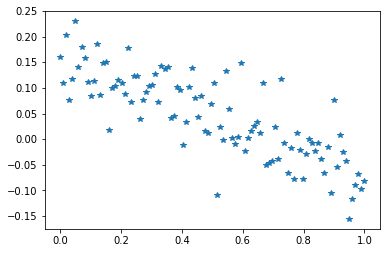

In [35]:
plt.plot(x,y,'*')

### Create tensorflow variables and placeholders. 


### Init the variables with random values.

In [36]:
m = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [37]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

### Make a prediction using line equation and init values on first interation.

In [38]:
y_pred = m*X + c

### Calculate the mean squared error (MSE) between our prediction and actual.

In [39]:
err = tf.square(y_pred-Y)/(2*len(x))

### Create a tensorflow Gradient Descent Optimizer with a low learning rate.


### Set the optimizer to minimize our error function from previous step.

In [40]:
opz = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train = opz.minimize(err)

### Init the tf variables.

In [41]:
varInit = tf.global_variables_initializer()

### Run the learning for 'iter' number of iterations.

In [42]:
with tf.Session() as sess:
    sess.run(varInit)
    for iter in range(numIter):
        #for xpt,ypt in zip(x,y):
        random_indices = np.random.randint(len(x),size=20)
        xpt = x[random_indices]
        ypt = y[random_indices]
        sess.run(train, feed_dict={X:xpt, Y:ypt})
        
    m_final, c_final = sess.run([m,c])

### Print the final slope and y-intercept

In [43]:
print(m_final, c_final)

-0.39694118 0.24838495


### Create a line with learnt values to plot line.

In [44]:
xplt = np.linspace(0, 1, numSamples)
yplt = xplt*m_final + c_final

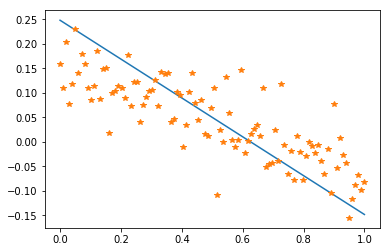

In [45]:
plt.plot(xplt, yplt)
plt.plot(x,y,'*')